In [5]:
import pandas as pd
import numpy as np
import os
import sys

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
CLEANED_READS_PATH = '../outputs/cleaned_reads_2021-07-07.csv'
df = pd.read_csv(CLEANED_READS_PATH)
print(df.shape)
df.columns

(436, 39)


Index(['index', 'read_idx', 'align_idx', 'align_type', 'chrom', 'start', 'end',
       'strand', 'read_name', 'read_length', 'read_start', 'read_end',
       'mapping_quality', 'align_score', 'align_base_qscore', 'phase_set',
       'phase_qual', 'haplotype', 'pass_filter', 'filter_reason',
       'fragment_id', 'num_contained_fragments', 'num_overlapping_fragments',
       'overlap_length', 'fragment_start', 'fragment_end', 'perc_of_alignment',
       'perc_of_fragment', 'is_contained', 'Chromosome', 'Total length (bp)',
       'GenBank accession', 'RefSeq accession', 'fragment_mean', 'read_min',
       'read_max', 'n_fragments', 'first_fragment', 'last_fragment'],
      dtype='object')

Text(0.5, 1.0, 'SC Contact Order for Chromosome 19')

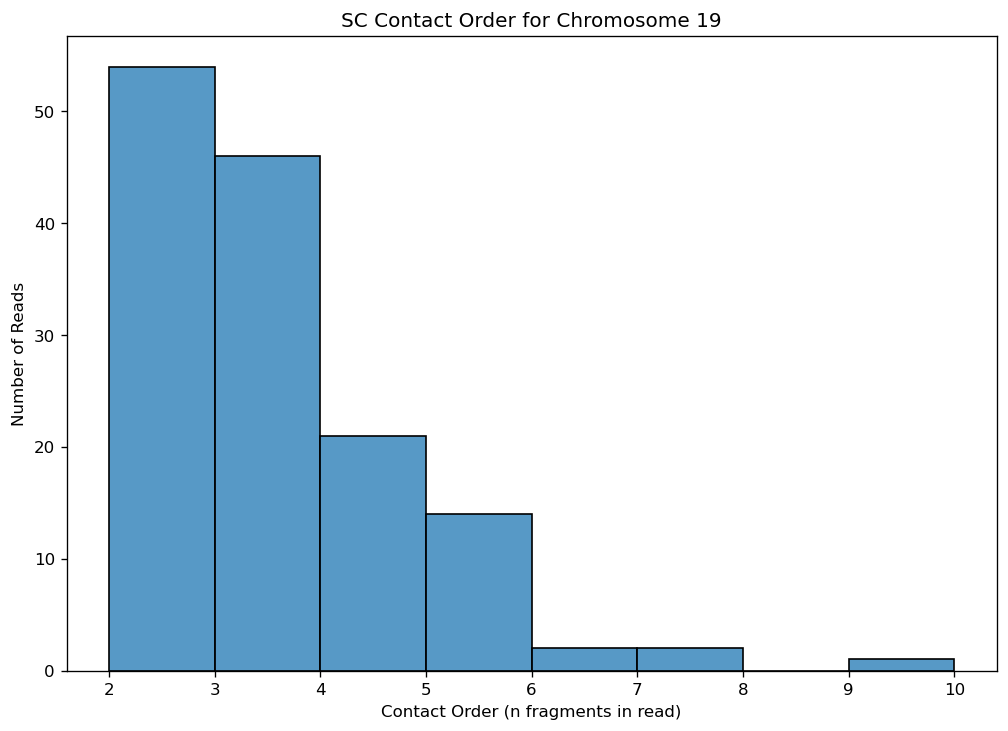

In [10]:
tmp = df[['read_idx', 'n_fragments']].drop_duplicates()

matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (10, 7)
sns.histplot(data=tmp,
             x='n_fragments', 
             binwidth=1)

plt.ylabel("Number of Reads")
plt.xlabel("Contact Order (n fragments in read)")
plt.title("SC Contact Order for Chromosome 19")

Text(0.5, 1.0, 'Mapping Quality and Alignment vs. Contact Order (Chr19)')

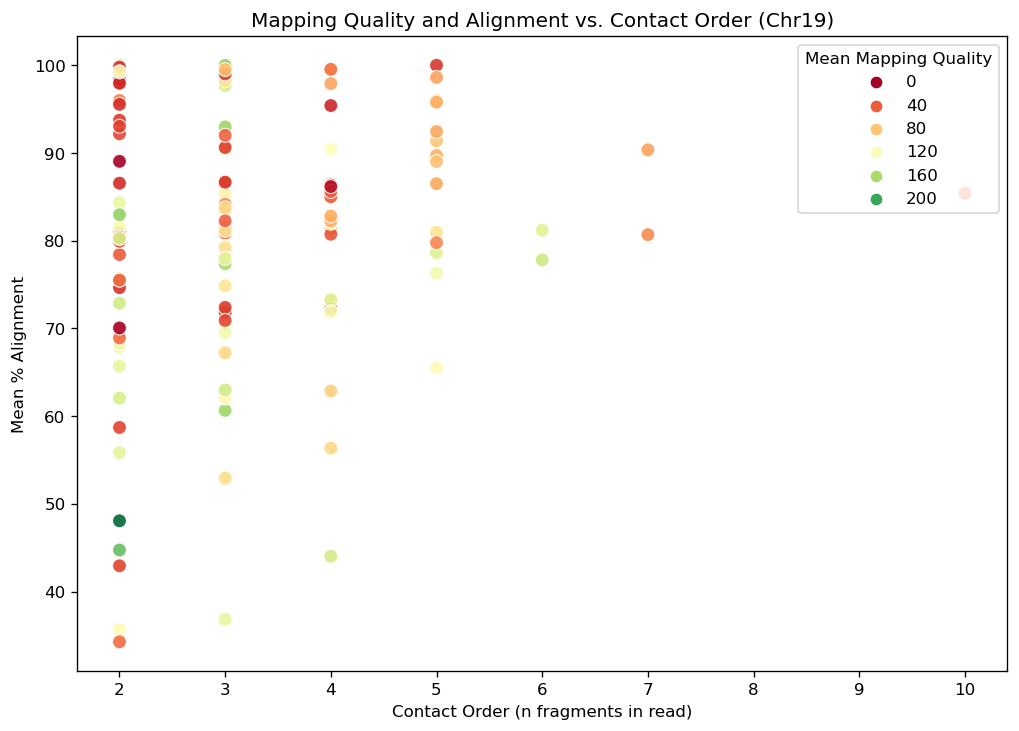

In [42]:
tmp = df.groupby('read_idx', as_index=False).agg({
    'n_fragments' : 'first',
    'mapping_quality' : np.mean,
    'perc_of_alignment' : np.mean
})

matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (10, 7)
sns.scatterplot(data=tmp,
                x='n_fragments',
                y='perc_of_alignment',
                hue='mapping_quality', 
                palette='RdYlGn',
                s=70,
                alpha=0.9)

plt.legend(loc='upper right', title='Mean Mapping Quality')
plt.ylabel("Mean % Alignment")
plt.xlabel("Contact Order (n fragments in read)")
plt.title("Mapping Quality and Alignment vs. Contact Order (Chr19)")

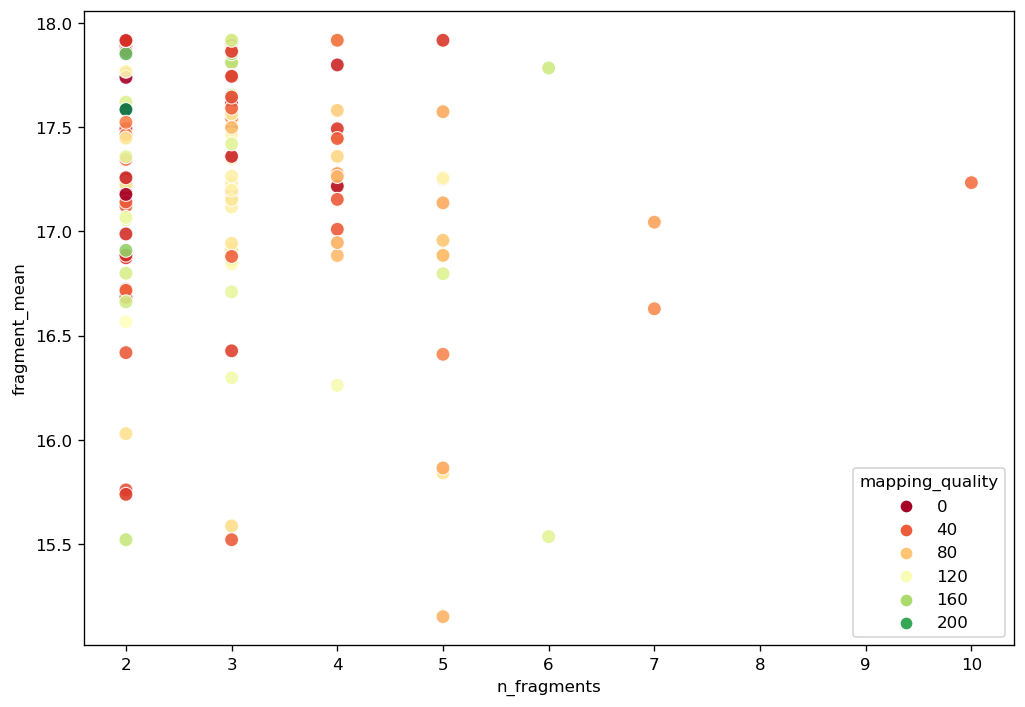

In [40]:
def max_dist(group_x):
    mid_point = (np.max(group_x) - np.min(group_x)) / 2
    dists = [np.sqrt((xi - mid_point)**2) for xi in group_x]
    return np.max(dists)


tmp = df.groupby('read_idx', as_index=False).agg({
    'n_fragments' : 'first',
    'mapping_quality' : np.mean,
    'fragment_mean' : max_dist,
})

tmp['fragment_mean'] = np.log(tmp['fragment_mean'])

sns.scatterplot(data=tmp,
                x='n_fragments',
                y='fragment_mean',
                hue='mapping_quality', 
                palette='RdYlGn',
                s=70,
                alpha=0.9)

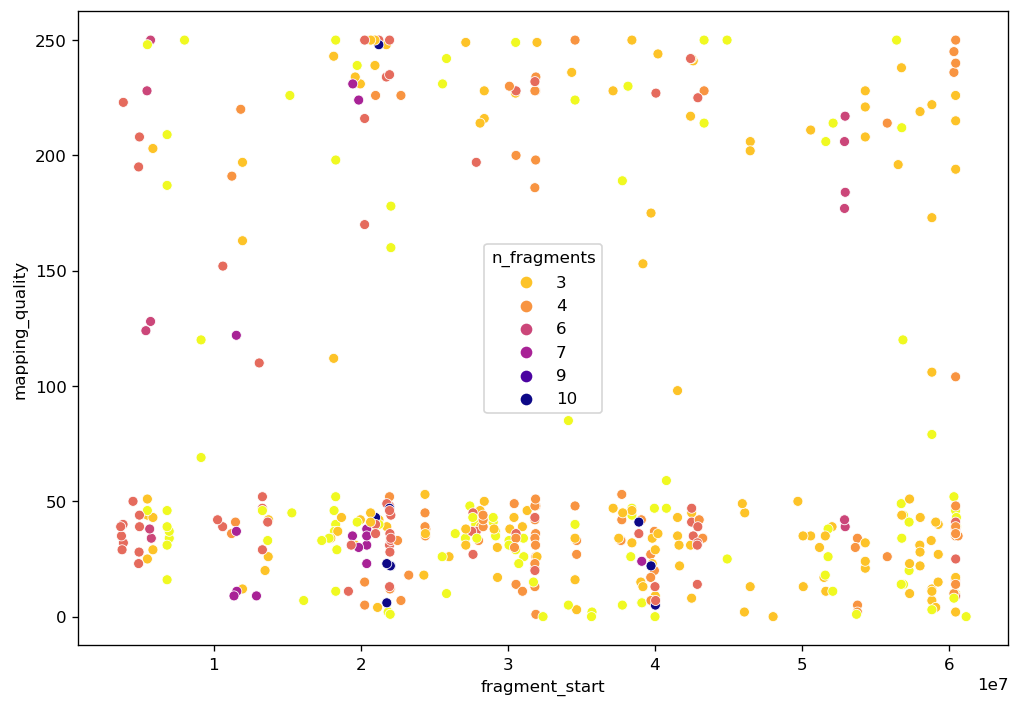

In [50]:
sns.scatterplot(data=df, 
                x='fragment_start', 
                y='mapping_quality',
                hue='n_fragments', 
                palette='plasma_r')

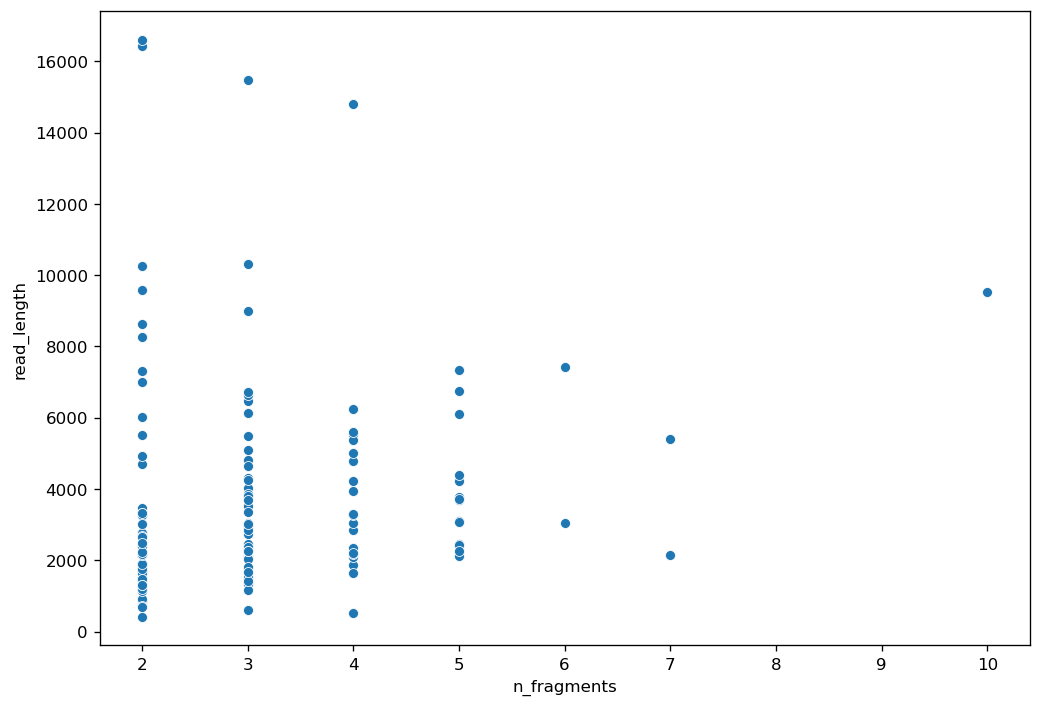

In [43]:
tmp = df[['read_idx', 'read_length', 'n_fragments']].drop_duplicates()

matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (10, 7)
sns.scatterplot(data=tmp,
             x='n_fragments', 
             y='read_length')

# plt.ylabel("Number of Reads")
# plt.xlabel("Contact Order (n fragments in read)")
# plt.title("SC Contact Order for Chromosome 19")